# Step 0 : We import the necessary modules and files

In [2]:
import numpy as np
from scipy.stats import entropy
import pandas as pd
import math
import matplotlib.pyplot as plt
import wooldridge as woo
import statsmodels.formula.api as smf

In [3]:
dataFF_red_norm01 = pd.read_csv('dataFF_red_norm01.csv')
dataFF_red_norm_gauss = pd.read_csv('dataFF_red_norm_gauss.csv')

# Step 1 : We run first regressions

b: 
Intercept     -0.377981
Nb_doct_8km    0.000047
dtype: float64



Text(0.5, 0, 'nbDoc8km')

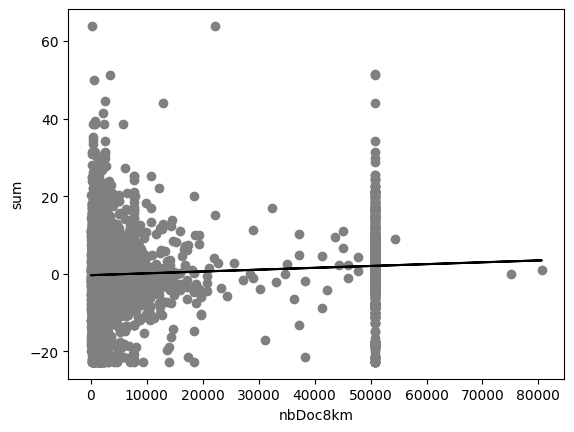

In [4]:
reg = smf.ols(formula='sum~ Nb_doct_8km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# scatter plot and fitted values:
plt.plot('Nb_doct_8km', "sum", data=dataFF_red_norm_gauss, color='grey', marker='o', linestyle='')
plt.plot(dataFF_red_norm_gauss['Nb_doct_8km'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('sum')
plt.xlabel('nbDoc8km')

In [5]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.17
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.93e-09
Time:                        09:48:05   Log-Likelihood:                -19228.
No. Observations:                5294   AIC:                         3.846e+04
Df Residuals:                    5292   BIC:                         3.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3780      0.

In [6]:
reg = smf.ols(formula='sum~ same_gender_8km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept         -0.356471
same_gender_8km    0.000087
dtype: float64



In [7]:
reg = smf.ols(formula='sum~ Nb_doct_2km+Nb_doct_8km+Nb_doct_30km+Nb_doct_f_2km+Nb_doct_f_8km+Nb_doct_f_30km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')


b: 
Intercept        -0.180363
Nb_doct_2km      -0.002281
Nb_doct_8km      -0.000400
Nb_doct_30km     -0.000049
Nb_doct_f_2km     0.004200
Nb_doct_f_8km     0.000933
Nb_doct_f_30km    0.000056
dtype: float64



In [8]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')
#vote1.describe()

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.08
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.62e-12
Time:                        09:48:05   Log-Likelihood:                -19213.
No. Observations:                5294   AIC:                         3.844e+04
Df Residuals:                    5287   BIC:                         3.849e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.180

In [9]:
reg = smf.ols(formula='sum~same_gender_2km+same_gender_8km+same_gender_30km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept          -0.177345
same_gender_2km    -0.000082
same_gender_8km     0.000204
same_gender_30km   -0.000041
dtype: float64



In [10]:
reg = smf.ols(formula='sum~share_F+Standardized_population+Nb_doct_8km+APL', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     38.68
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           5.84e-32
Time:                        09:48:09   Log-Likelihood:                -19170.
No. Observations:                5294   AIC:                         3.835e+04
Df Residuals:                    5289   BIC:                         3.838e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

## Step 2 : We test the relevance of fibre-optic as an instrument 

In [30]:
dataFF_red_norm01.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees_b', 'Other_formations_b',
       'Experiences_b', 'Formations_b', 'Work_&_publications_b', 'gender',
       'codecommunecoordstructure3', 'RPPS', 'Nb_price', 'Min_price',
       'Max_price', 'Population', 'Superficie', 'Naissances', 'Deces',
       'Logements', 'Ménages', 'MED14', 'Population_P_actif', 'Chomeurs',
       'Actifs', 'share_F', 'Standardized_population', 'Sector', 'Nb_doct_2km',
       'Nb_doct_8km', 'Nb_doct_30km', 'Nb_doct_f_2km', 'Nb_doct_f_8km',
       'Nb_doct_f_30km', 'same_gender_2km', 'same_gender_8km',
       'same_gender_30km', 'Nb_doct_D_2km', 'Nb_doct_D_8km', 'Nb_doct_D_30km',
   

In [12]:
reg = smf.ols(formula='share_Doctolib~Fibre+share_F+Standardized_population', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept                  4.806969e-01
Fibre                     -2.802117e-01
share_F                   -1.570734e-02
Standardized_population   -9.068820e-07
dtype: float64



In [32]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         share_Doctolib   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     333.8
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.59e-198
Time:                        10:54:10   Log-Likelihood:                 1093.6
No. Observations:                5294   AIC:                            -2179.
Df Residuals:                    5290   BIC:                            -2153.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

In [33]:
# Convertir en DataFrame
summary_df = results.summary2().tables[0]  # La table des coefficients
type(summary_df)
# Générer le LaTeX à partir du DataFrame
latex_table = summary_df.to_latex()

# Afficher la table LaTeX
print(latex_table)


\begin{tabular}{lllll}
\toprule
 & 0 & 1 & 2 & 3 \\
\midrule
0 & Model: & OLS & Adj. R-squared: & 0.159 \\
1 & Dependent Variable: & share_Doctolib & AIC: & -2179.2534 \\
2 & Date: & 2024-11-05 10:54 & BIC: & -2152.9561 \\
3 & No. Observations: & 5294 & Log-Likelihood: & 1093.6 \\
4 & Df Model: & 3 & F-statistic: & 333.8 \\
5 & Df Residuals: & 5290 & Prob (F-statistic): & 1.59e-198 \\
6 & R-squared: & 0.159 & Scale: & 0.038763 \\
\bottomrule
\end{tabular}



In [34]:
dataFF_red_norm01.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees_b', 'Other_formations_b',
       'Experiences_b', 'Formations_b', 'Work_&_publications_b', 'gender',
       'codecommunecoordstructure3', 'RPPS', 'Nb_price', 'Min_price',
       'Max_price', 'Population', 'Superficie', 'Naissances', 'Deces',
       'Logements', 'Ménages', 'MED14', 'Population_P_actif', 'Chomeurs',
       'Actifs', 'share_F', 'Standardized_population', 'Sector', 'Nb_doct_2km',
       'Nb_doct_8km', 'Nb_doct_30km', 'Nb_doct_f_2km', 'Nb_doct_f_8km',
       'Nb_doct_f_30km', 'same_gender_2km', 'same_gender_8km',
       'same_gender_30km', 'Nb_doct_D_2km', 'Nb_doct_D_8km', 'Nb_doct_D_30km',
   

In [ ]:
reg = smf.ols(formula='Nb_doct_30km~Fibre+share_F+Standardized_population+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           Nb_doct_30km   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     162.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.78e-133
Time:                        14:02:42   Log-Likelihood:                -745.94
No. Observations:                6873   AIC:                             1502.
Df Residuals:                    6868   BIC:                             1536.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [10]:
reg = smf.ols(formula='same_gender_30km~Fibre+share_F+Standardized_population+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:       same_gender_30km   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.84e-156
Time:                        11:31:12   Log-Likelihood:                 3041.9
No. Observations:                5294   AIC:                            -6074.
Df Residuals:                    5289   BIC:                            -6041.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

# Step 3 :  We test the relevance of township’s parameters as an instrument 

In [35]:
reg = smf.ols(formula='np.log(Nb_doct_30km)~Fibre+np.log(MED14)+Superficie+Ménages+Chomeurs+Actifs+Population_P_actif+Naissances+Deces+Logements+share_F+Standardized_population+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)


results.summary(): 
                             OLS Regression Results                             
Dep. Variable:     np.log(Nb_doct_30km)   R-squared:                       0.698
Model:                              OLS   Adj. R-squared:                  0.698
Method:                   Least Squares   F-statistic:                     940.3
Date:                  Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                          10:54:10   Log-Likelihood:                -6620.0
No. Observations:                  5294   AIC:                         1.327e+04
Df Residuals:                      5280   BIC:                         1.336e+04
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
reg = smf.ols(formula='Nb_doct_D_30km~Fibre+share_F+Standardized_population+APL+MED14', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         Nb_doct_D_30km   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     233.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.31e-231
Time:                        14:02:42   Log-Likelihood:                 18918.
No. Observations:                6873   AIC:                        -3.782e+04
Df Residuals:                    6867   BIC:                        -3.778e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [24]:
# Convertir en DataFrame
summary_df = results.summary2().tables[0]  # La table des coefficients
type(summary_df)
# Générer le LaTeX à partir du DataFrame
latex_table = summary_df.to_latex()

# Afficher la table LaTeX
print(latex_table)

\begin{tabular}{lllll}
\toprule
 & 0 & 1 & 2 & 3 \\
\midrule
0 & Model: & OLS & Adj. R-squared: & 0.145 \\
1 & Dependent Variable: & Nb_doct_D_30km & AIC: & -37823.3537 \\
2 & Date: & 2024-10-29 14:02 & BIC: & -37782.3416 \\
3 & No. Observations: & 6873 & Log-Likelihood: & 18918. \\
4 & Df Model: & 5 & F-statistic: & 233.4 \\
5 & Df Residuals: & 6867 & Prob (F-statistic): & 8.31e-231 \\
6 & R-squared: & 0.145 & Scale: & 0.00023831 \\
\bottomrule
\end{tabular}



In [ ]:
reg = smf.ols(formula='Nb_doct_D_30km~share_F+Standardized_population+APL+MED14+Deaths', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

# Step 4 : we run automatic IV regression

In [41]:
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_30km ~ Deces+Fibre] +MED14+Population+Superficie+Naissances+Logements+Chomeurs+Actifs+ share_F + np.log(Standardized_population) + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()
print(results_iv)
# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                    sum   R-squared:                     -0.0118
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0139
No. Observations:                5294   F-statistic:                    220.13
Date:                Tue, Nov 05 2024   P-value (F-stat)                0.0000
Time:                        11:26:59   Distribution:                 chi2(11)
Cov. Estimator:                robust                                         
                                                                              
                                        Parameter Estimates                                        
                                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------------
Intercept                          -8.1553     5.0453    -1.6164    

In [38]:
reg = smf.ols(formula='sum ~ Nb_doct_30km +MED14+Population+Superficie+Naissances+Logements+Chomeurs+Actifs+ share_F + np.log(Standardized_population) + APL', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     24.16
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.90e-49
Time:                        11:06:39   Log-Likelihood:                -19116.
No. Observations:                5294   AIC:                         3.826e+04
Df Residuals:                    5282   BIC:                         3.833e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [same_gender_30km ~ MED14+Population+Superficie+Naissances+Deces+Logements+Chomeurs+Actifs] + share_F + np.log(Standardized_population) + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

table_iv: 
                                  b_auto  se_auto   t_auto
Intercept                       -16.1962   1.3499 -11.9983
share_F                          -1.3419   0.6762  -1.9845
np.log(Standardized_population)   1.5465   0.1410  10.9699
APL                               0.1460   0.1171   1.2466
same_gender_30km                 14.2466   2.2719   6.2709

\begin{tabular}{lrrr}
\toprule
 & b_auto & se_auto & t_auto \\
\midrule
Intercept & -16.1962 & 1.3499 & -11.9983 \\
share_F & -1.3419 & 0.6762 & -1.9845 \\
np.log(Standardized_population) & 1.5465 & 0.1410 & 10.9699 \\
APL & 0.1460 & 0.1171 & 1.2466 \\
same_gender_30km & 14.2466 & 2.2719 & 6.2709 \\
\bottomrule
\end{tabular}



In [ ]:
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_D_8km ~ MED14+Population+Superficie+Naissances+Deces+Logements+Chomeurs+Actifs] + share_F + Standardized_population + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

table_iv: 
                                                      b_auto  se_auto  t_auto
Intercept                                            -1.6827   0.4599 -3.6587
share_F                                              -0.3126   0.5610 -0.5572
Population_standardisee_par_la_consommation_de_...    0.0000   0.0000  9.9356
APL                                                   0.1071   0.1015  1.0546
Nb_doct_D_8km                                       145.6611  20.5043  7.1039

\begin{tabular}{lrrr}
\toprule
 & b_auto & se_auto & t_auto \\
\midrule
Intercept & -1.6827 & 0.4599 & -3.6587 \\
share_F & -0.3126 & 0.5610 & -0.5572 \\
Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age & 0.0000 & 0.0000 & 9.9356 \\
APL & 0.1071 & 0.1015 & 1.0546 \\
Nb_doct_D_8km & 145.6611 & 20.5043 & 7.1039 \\
\bottomrule
\end{tabular}



# Step 5 : We run clustered regressions

In [ ]:
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_30km ~ MED14+Population+Superficie+Naissances+Deces+Logements+Chomeurs+Actifs] + share_F + Standardized_population + APL', data=dataFF_red_norm_gauss).fit(cov_type='clustered', clusters=dataFF_red_norm_gauss['codecommunecoordstructure3'])
# print regression table:
table_iv = pd.DataFrame({'b_auto': round(reg_iv.params, 4),
                         'se_auto': round(reg_iv.std_errors, 4),
                         't_auto': round(reg_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
print(reg_iv.summary.as_latex())

table_iv: 
                                                     b_auto  se_auto  t_auto
Intercept                                           -2.1604   0.8340 -2.5903
share_F                                             -1.6060   0.9920 -1.6189
Population_standardisee_par_la_consommation_de_...   0.0000   0.0000  6.1765
APL                                                 -0.0036   0.1797 -0.0202
Nb_doct_30km                                        10.3169   1.7630  5.8518

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                                                                   &        sum         & \textbf{  R-squared:         } &     -0.0597      \\
\textbf{Estimator:}                                                                       &      IV-2SLS       & \textbf{  Adj. R-squared:    } &     -0.0603      \\
\textbf{No. Observations:}                                                                &        6873        & \textbf{  F-statistic:       } &   

In [53]:
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_30km ~ np.log(Deces+1)] +Fibre+(MED14)+(Superficie)+(Naissances)+(Logements)+(Chomeurs)+(Actifs)+ share_F + np.log(Standardized_population) + APL', data=dataFF_red_norm_gauss).fit(cov_type='clustered', clusters=dataFF_red_norm_gauss['codecommunecoordstructure3'])
# print regression table:
print(reg_iv)
table_iv = pd.DataFrame({'b_auto': round(reg_iv.params, 4),
                         'se_auto': round(reg_iv.std_errors, 4),
                         't_auto': round(reg_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
print(reg_iv.summary.as_latex())

                          IV-2SLS Estimation Summary                          
Dep. Variable:                    sum   R-squared:                      0.0132
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0111
No. Observations:                5294   F-statistic:                    389.76
Date:                Tue, Nov 05 2024   P-value (F-stat)                0.0000
Time:                        11:38:43   Distribution:                 chi2(11)
Cov. Estimator:             clustered                                         
                                                                              
                                        Parameter Estimates                                        
                                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------------
Intercept                          -23.333     4.6143    -5.0568    